<a href="https://colab.research.google.com/github/vicky-getova/FYP/blob/main/Pre_processing_and_Segmentation_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting my OneDrive to the notebook in order to load the dataset folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# %cd /content/drive/MyDrive/Colab Notebooks/FYP/

In [3]:
# Extracting the folder from OneDrive to a folder in a the notebook
!cp "/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB_data.zip" "ALL_IDB.zip"

In [4]:
# Unzipping the dataset folder in a new folder
!unzip -uq "ALL_IDB.zip" -d "ALL_IDB"

In [5]:
from IPython.display import Image

In [6]:
# Loading an image from the ALL_IDB1 file using cv2.imread() funnction.
# Input parameters: 
#   path
#   flag = 1 (to load a color image)
import cv2
img_color = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB1/ALL_IDB1/im/Im072_0.jpg',1)


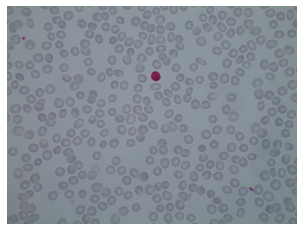

In [7]:
from matplotlib import pyplot as plt
plt.imshow(img_color)
plt.axis("off")
plt.show()

In [8]:
import os
!ls
os.getcwd()

ALL_IDB  ALL_IDB.zip  drive  sample_data


'/content'

In [9]:
from matplotlib import pyplot as plt
import cv2
items = os.listdir('/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB1/ALL_IDB1/im')
print (items)

['Im001_1.jpg', 'Im005_1.jpg', 'Im002_1.jpg', 'Im009_1.jpg', 'Im007_1.jpg', 'Im010_1.jpg', 'Im004_1.jpg', 'Im003_1.jpg', 'Im006_1.jpg', 'Im008_1.jpg', 'Im011_1.jpg', 'Im012_1.jpg', 'Im024_1.jpg', 'Im027_1.jpg', 'Im013_1.jpg', 'Im032_1.jpg', 'Im031_1.jpg', 'Im021_1.jpg', 'Im036_0.jpg', 'Im015_1.jpg', 'Im023_1.jpg', 'Im018_1.jpg', 'Im014_1.jpg', 'Im017_1.jpg', 'Im025_1.jpg', 'Im029_1.jpg', 'Im034_0.jpg', 'Im026_1.jpg', 'Im030_1.jpg', 'Im022_1.jpg', 'Im020_1.jpg', 'Im033_1.jpg', 'Im035_0.jpg', 'Im019_1.jpg', 'Im028_1.jpg', 'Im016_1.jpg', 'Im038_0.jpg', 'Im037_0.jpg', 'Im039_0.jpg', 'Im043_0.jpg', 'Im044_0.jpg', 'Im045_0.jpg', 'Im046_0.jpg', 'Im042_0.jpg', 'Im041_0.jpg', 'Im040_0.jpg', 'Im056_1.jpg', 'Im054_1.jpg', 'Im055_1.jpg', 'Im049_1.jpg', 'Im051_1.jpg', 'Im050_1.jpg', 'Im048_1.jpg', 'Im047_0.jpg', 'Im053_1.jpg', 'Im052_1.jpg', 'Im059_1.jpg', 'Im060_1.jpg', 'Im058_1.jpg', 'Im062_1.jpg', 'Im066_0.jpg', 'Im057_1.jpg', 'Im061_1.jpg', 'Im065_0.jpg', 'Im063_1.jpg', 'Im064_0.jpg', 'Im069_0.

In [10]:
import re

ALL_images = []
for image in items:
        if re.search('[A-Za-z0-9]+_[1]+\.jp[a-zA-Z]', image): 
                ALL_images.append(image)
print('Number of ALL cancer images:', len(ALL_images))

healthy_images = []
for image in items:
        if re.search('[A-Za-z0-9]+_[0]+\.jp[a-zA-Z]', image): 
                healthy_images.append(image)
print('Number of healthy cell images:', len(healthy_images))

Number of ALL cancer images: 49
Number of healthy cell images: 59


In [11]:
ALL_list = []
for each_image in ALL_images:
  if each_image.endswith(".jpg"):
    full_path = "/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB1/ALL_IDB1/im/" + each_image
    image = cv2.imread(full_path, 1)
    im_resized = cv2.resize(image, (256, 256), interpolation=cv2.INTER_LINEAR)
    im_converted = cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB)
    ALL_list.append(im_converted)

print('Number of ALL cancer images:', len(ALL_list))

healthy_list = []
for each_image in healthy_images:
  if each_image.endswith(".jpg"):
    full_path = "/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB1/ALL_IDB1/im/" + each_image
    image = cv2.imread(full_path, 1)
    im_resized = cv2.resize(image, (256, 256), interpolation=cv2.INTER_LINEAR)
    im_converted = cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB)
    healthy_list.append(im_converted)

print('Number of healthy cell images:', len(healthy_list))

Number of ALL cancer images: 49
Number of healthy cell images: 59


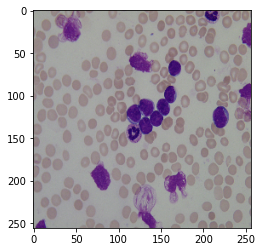

In [12]:
import matplotlib.pyplot as plt
def show_picture(image):
    plt.imshow(image)
    plt.show()

show_picture(ALL_list[0])

In [13]:
print(ALL_list[0].shape)
print(healthy_list[0].shape)

(256, 256, 3)
(256, 256, 3)


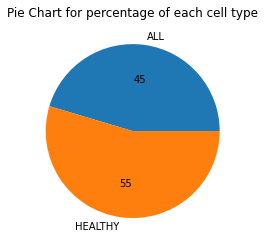

In [14]:
import pandas as pd
import numpy as np
cancer_dict = {"x_col":ALL_list, "y_col":[np.nan for x in range(len(ALL_list))]}
cancer_dict["y_col"] = "ALL"

normal_dict = {"x_col":healthy_list, "y_col":[np.nan for x in range(len(healthy_list))]}
normal_dict["y_col"] = "HEALTHY"


cancer_df = pd.DataFrame(cancer_dict)
normal_df = pd.DataFrame(normal_dict)

#train_df = cancer_df.append(normal_df, ignore_index=True)

plt.pie([len(ALL_list),len(healthy_list)],labels=["ALL","HEALTHY"],autopct='%.f')
plt.title('Pie Chart for percentage of each cell type')
plt.show()

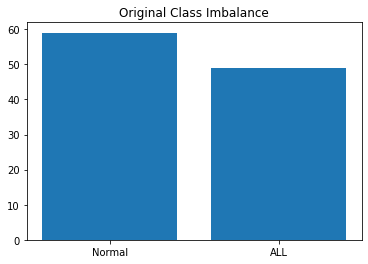

In [15]:
plt.bar(['Normal', 'ALL'], [len(healthy_list), len(ALL_list)])
plt.title('Original Class Imbalance')
plt.show()

Text(0.5, 1.0, 'HEM - Normal')

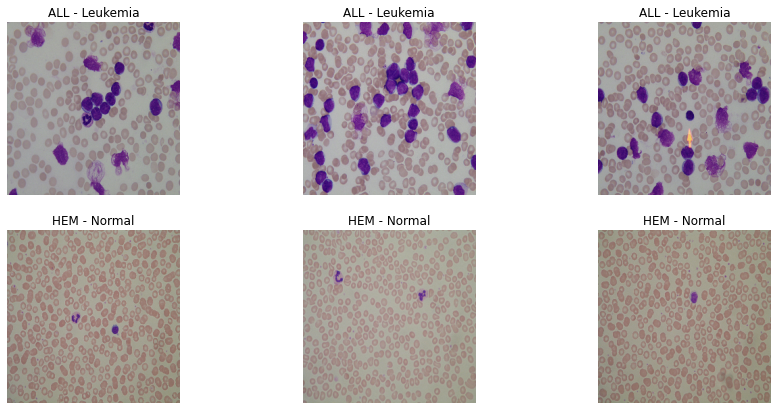

In [16]:
# Set figure
rows = 2
columns = 3
fig = plt.figure(figsize=(15, 7))

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# im1
plt.imshow(ALL_list[0])
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# im2
plt.imshow(ALL_list[1])
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# im3
plt.imshow(ALL_list[2])
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# im4
plt.imshow(healthy_list[0])
plt.axis('off')
plt.title('HEM - Normal')

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)

#im4
plt.imshow(healthy_list[1])
plt.axis('off')
plt.title('HEM - Normal')

# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)

#im6
plt.imshow(healthy_list[2])
plt.axis('off')
plt.title('HEM - Normal')

In [17]:
print('ALL rgb[0,0,:] => '+str(ALL_list[0][0,0,:]))
print('HEM rgb[0,0,:] => '+str(healthy_list[0][0,0,:]))

ALL rgb[0,0,:] => [147 126 135]
HEM rgb[0,0,:] => [151 151 134]


In [18]:
# Compute the lower and upper limits
lowerLimit = ALL_list[0][0][0][0] - 10, 100, 100
upperLimit = ALL_list[0][0][0][0] + 10, 255, 255

# display the lower and upper limits
print("Lower Limit:",lowerLimit)
print("Upper Limit", upperLimit)

Lower Limit: (137, 100, 100)
Upper Limit (157, 255, 255)


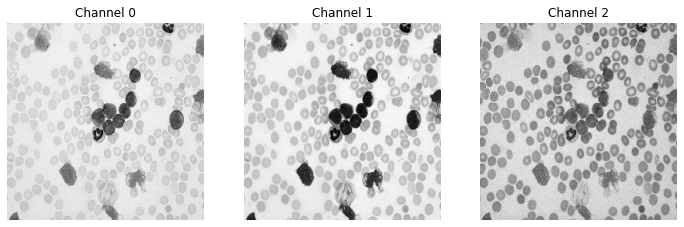

In [19]:
# FOR RGB IMAGES
plt.figure(figsize=(12, 4))
# Show each of the three channels
for ii in range(3):
    
    # Subplot indices start at 1
    plt.subplot(1, 3, ii+1)
    
    # Array indices start at 0
    image_channel = ALL_list[0][..., ii]
    plt.imshow(image_channel, cmap='gray')
    plt.title(f'Channel {ii}')
    plt.axis(False)

plt.show()

Showing Channel 1 -> Green Channel


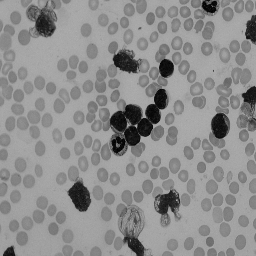

Showing Channel 1 -> Green Channel


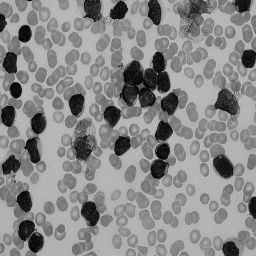

In [20]:
from google.colab.patches import cv2_imshow

blue =  ALL_list[0][:,:,0]
green = ALL_list[0][:,:,1]
red = ALL_list[0][:,:,2]

green2 = ALL_list[1][:,:,1]

print("Showing Channel 1 -> Green Channel")
cv2_imshow(green)
print("Showing Channel 1 -> Green Channel")
cv2_imshow(green2)

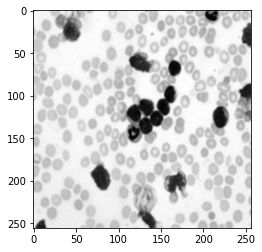

In [21]:
# # apply median filter for smoothing
# blurM = cv2.medianBlur(green, 3)
# plt.imshow(blurM, cmap='gray')
blurG = cv2.GaussianBlur(green,(3,3),0)
plt.imshow(blurG, cmap='gray')

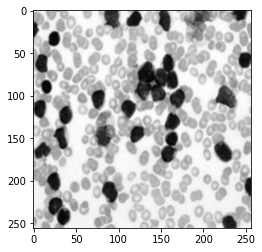

In [22]:
blurG2 = cv2.GaussianBlur(green2,(3,3),0)
plt.imshow(blurG2, cmap='gray')

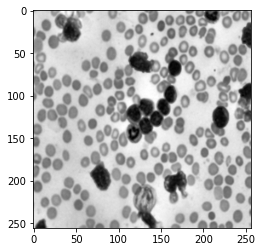

In [23]:
# create a CLAHE object for 
# Contrast Limited Adaptive Histogram Equalization (CLAHE) 
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8, 8))
claheNorm = clahe.apply(blurG)
plt.imshow(claheNorm, cmap='gray')

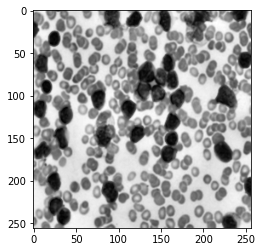

In [24]:
# create a CLAHE object for 
# Contrast Limited Adaptive Histogram Equalization (CLAHE) 

claheNorm2 = clahe.apply(blurG2)
plt.imshow(claheNorm2, cmap='gray')

Text(0, 0.5, 'counts')

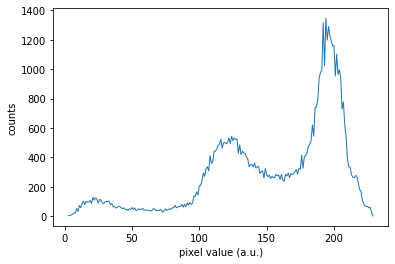

In [25]:
# Utilities for image processing
import skimage.io
import skimage.exposure
import skimage.measure
# Generate the histogram of the image. `skimage.exposure.histogram` will return
# the values of the histogram as well as the centers of the bins.
hist, bins = skimage.exposure.histogram(claheNorm)

# Plot the histogram values versus the bin centers.
plt.plot(bins, hist, linewidth=1)
plt.xlabel('pixel value (a.u.)')
plt.ylabel('counts')

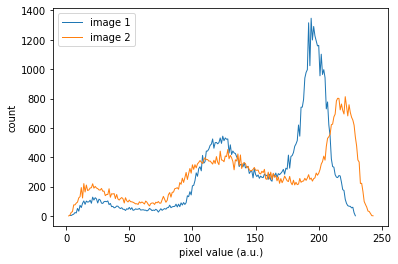

In [26]:
# Generate the histograms for each image.
hist_im1, bins_im1 = skimage.exposure.histogram(claheNorm)
hist_im2, bins_im2 = skimage.exposure.histogram(claheNorm2)

# Each histogram over eachother. 
plt.plot(bins_im1, hist_im1, label='image 1', linewidth=1)
plt.plot(bins_im2, hist_im2, label='image 2', linewidth=1)
plt.xlabel('pixel value (a.u.)')
plt.ylabel('count')
plt.legend()

In [27]:
def normalize_im(im):
    """
    Normalizes a given image such that the values range between 0 and 1.     
    
    Parameters
    ---------- 
    im : 2d-array
        Image to be normalized.
        
    Returns
    -------
    im_norm: 2d-array
        Normalized image ranging from 0.0 to 1.0. Note that this is now
        a floating point image and not an unsigned integer array. 
    """
    im_norm = (im - im.min()) / (im.max() - im.min())
    return im_norm

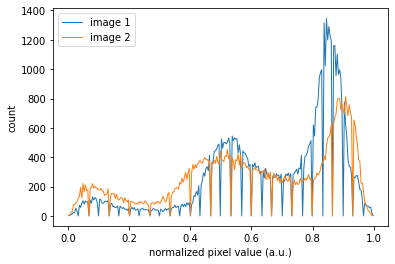

In [28]:
# Normalize both images.
phase_norm1 = normalize_im(claheNorm)
phase_norm2 = normalize_im(claheNorm2)

# Generate both histograms. 
hist_norm1, bins_norm1 = skimage.exposure.histogram(phase_norm1)
hist_norm2, bins_norm2 = skimage.exposure.histogram(phase_norm2)

# Plot both histograms on the same set of axes. 
plt.plot(bins_norm1, hist_norm1, label='image 1', linewidth=1)
plt.plot(bins_norm2, hist_norm2, label='image 2', linewidth=1)

# Add labels as expected. 
plt.xlabel('normalized pixel value (a.u.)')
plt.ylabel('count')
plt.legend()

Text(0.5, 1.0, 'image 2')

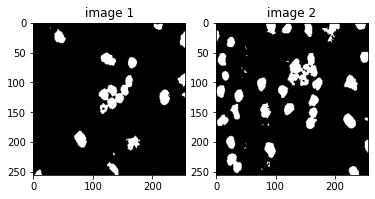

In [29]:
# Apply the threshold. 
thresh_val = 0.3
thresh_im1 = phase_norm1 < thresh_val
thresh_im2 = phase_norm2 < thresh_val

# Set up the axes for plotting.  
fig, ax = plt.subplots(nrows=1, ncols=2)
# This generates a single row of images with two columns and assigns them to 
# a variable `ax`.

# Plot the first image
ax[0].imshow(thresh_im1, cmap='gray')
ax[0].set_title('image 1')

# Plot the second image.
ax[1].imshow(thresh_im2, cmap='gray')
ax[1].set_title('image 2')

Text(0.5, 1.0, 'image 2')

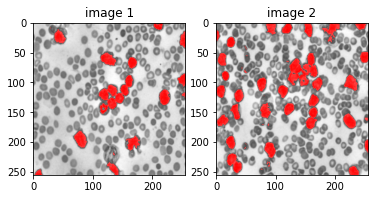

In [30]:
# Make copies of each normalized phase image. 
phase_copy1 = np.copy(phase_norm1)
phase_copy2 = np.copy(phase_norm2)

# Using the segmentation masks, color the pixels with a value of 1.0 wherever a
# segmented object exists. 
phase_copy1[thresh_im1] = 1.0
phase_copy2[thresh_im2] = 1.0

# Make an RGB image of the segmentation by generating a three dimensional array.
rgb_image1 = np.dstack((phase_copy1, phase_norm1, phase_norm1))
rgb_image2 = np.dstack((phase_copy2, phase_norm2, phase_norm2))

# Show both images again using a subplot. Since these are RGB, we won't need to 
# use a colormap.
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(rgb_image1)
ax[0].set_title('image 1')
ax[1].imshow(rgb_image2)
ax[1].set_title('image 2')

In [31]:
# Label each individual cell. 
im_lab1, num_obj1 = skimage.measure.label(thresh_im1, return_num=True)
im_lab2, num_obj2 = skimage.measure.label(thresh_im2, return_num=True)  
# Print out how many we identified.
print("Number of objects found in test image 1: %s" %num_obj1)
print("Number of objects found in test image 2: %s" %num_obj2)

Number of objects found in test image 1: 17
Number of objects found in test image 2: 44


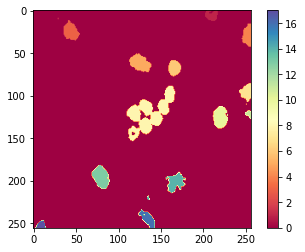

In [32]:
import matplotlib.cm
# Show our labeled objects using a a different color map than gray. 
rainbow = plt.cm.Spectral
plt.imshow(im_lab1, cmap=rainbow)
plt.colorbar()

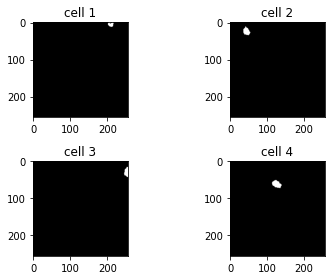

In [33]:
# Generate a subplot to look at four different cells 
# fig = plt.figure(figsize=(15, 7))

fig, ax = plt.subplots(nrows=2, ncols=2)

# Isolate cells 1, 2, 3, 4
cell_1 = im_lab1 == 1
cell_2 = im_lab1 == 3
cell_3 = im_lab1 == 4
cell_4 = im_lab1 == 5


# Show each cell
ax[0, 0].imshow(cell_1, cmap='gray')
ax[0, 1].imshow(cell_2, cmap='gray')
ax[1, 0].imshow(cell_3, cmap='gray')
ax[1, 1].imshow(cell_4, cmap='gray')

# Add the titles
ax[0, 0].set_title('cell 1')
ax[0, 1].set_title('cell 2')
ax[1, 0].set_title('cell 3')
ax[1, 1].set_title('cell 4')

# Adjust the spacing so the labels don't overlap
plt.tight_layout()

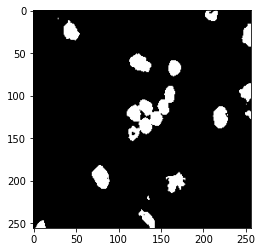

In [34]:
# thresh_val = 70
# thresh_im = claheNorm > thresh_val

# Plot the image.
plt.imshow(thresh_im1, cmap='gray')

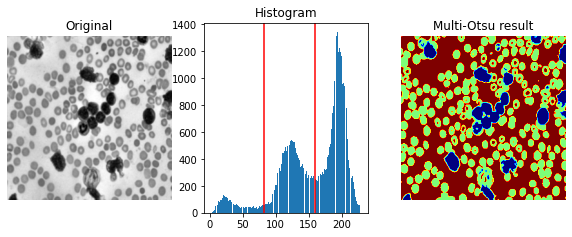

In [35]:
from skimage.filters import threshold_multiotsu
# Applying multi-Otsu threshold for the default value, generating
# three classes.

thresholds = threshold_multiotsu(claheNorm)

# Using the threshold values, we generate the three regions.
regions = np.digitize(claheNorm, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(claheNorm, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(claheNorm.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

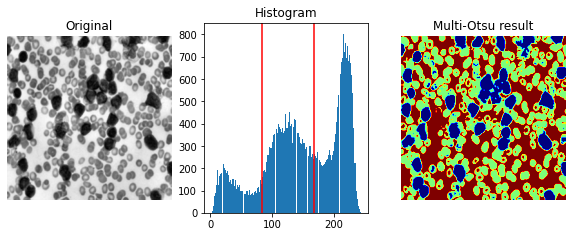

In [36]:
from skimage.filters import threshold_multiotsu
# Applying multi-Otsu threshold for the default value, generating
# three classes.

thresholds = threshold_multiotsu(claheNorm2)

# Using the threshold values, we generate the three regions.
regions = np.digitize(claheNorm2, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(claheNorm2, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(claheNorm2.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

In [37]:
print(claheNorm.shape)
print(thresh_im1.shape)

(256, 256)
(256, 256)


70.0


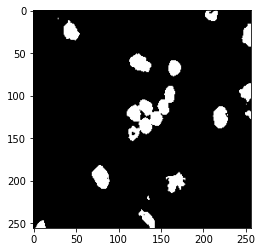

In [38]:
# cv2.THRESH_BINARY_INV - white cells on black background
# cv2.THRESH_BINARY - black cells on white background
ret, thresh1 = cv2.threshold(claheNorm, 70, 255, cv2.THRESH_BINARY_INV )
plt.imshow(thresh1, cmap='gray')
print(ret)

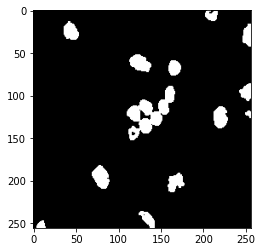

In [39]:
# define the kernel
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
# Plot the image.
plt.imshow(opening, cmap='gray')

In [40]:
# kernel = np.ones((2,2),np.uint8)
# erosion = cv2.erode(opening, kernel, iterations = 1)
# cv2_imshow(erosion)

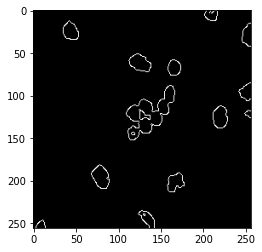

In [41]:
# Find Canny edges
edged = cv2.Canny(opening, 70, 200)
plt.imshow(edged, cmap='gray')

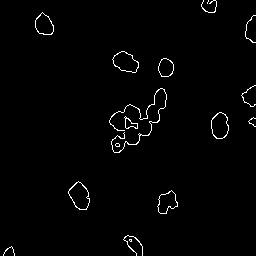

Number of Contours found = 17


In [42]:
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged.copy(), 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
cv2_imshow(edged)
cv2.waitKey(0)
  
print("Number of Contours found = " + str(len(contours)))


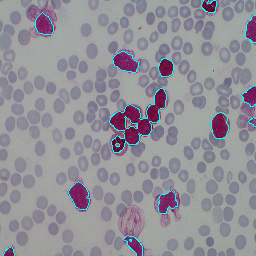

In [43]:
  # Draw all contours
# -1 signifies drawing all contours
original_img_copy1 = ALL_list[0].copy()
# print(opening_copy.shape)
cv2.drawContours(original_img_copy1, contours, contourIdx = -1, color = (255, 255, 0), thickness = 1)
  
cv2_imshow(original_img_copy1)

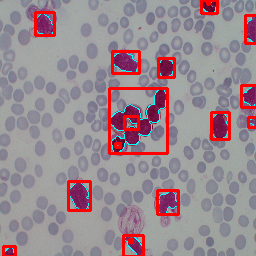

In [44]:
for cont in contours:
    rect = cv2.boundingRect(cont)
    x,y,w,h = rect
    cv2.rectangle(original_img_copy1, (x,y),(x+w,y+h),(0,0,255),2)
cv2_imshow(original_img_copy1)

In [45]:
# extracting row and columns from tuple (rows, columns, channels)
height, width = opening.shape[:2]
print(height, width)

256 256


258 258


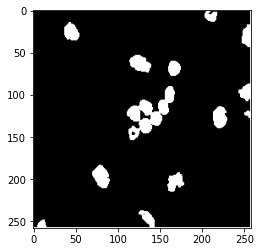

In [46]:
from pyparsing.helpers import White
# add 1 pixel white border all around
# top=1, bottom=1, left=1, right=1 mean that 1 pixel-wide border needs to be built
# value = 0 -> black
pad = cv2.copyMakeBorder(opening, 1,1,1,1, cv2.BORDER_CONSTANT, value=255)
height, width = pad.shape
plt.imshow(pad, cmap = 'gray')
print(height, width)

In [47]:
# create zeros mask 2 pixels larger in each dimension
mask = np.zeros([height + 2, width + 2], np.uint8)
print(mask.shape)

(260, 260)


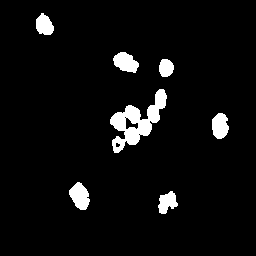

In [48]:
# floodfill outer white border with black
img_floodfill = cv2.floodFill(pad, mask, seedPoint = (0,0), newVal =  0, flags=8)[1]
# remove border
img_floodfill = img_floodfill[1:height-1, 1:width-1]    
# plt.imshow(img_floodfill, cmap = 'gray')

# show the images
cv2_imshow(img_floodfill)
cv2.waitKey(0)
cv2.destroyAllWindows()

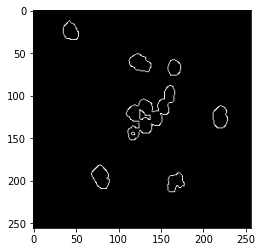

In [49]:
# Find Canny edges
edged_cleaned = cv2.Canny(img_floodfill, 70, 200)
plt.imshow(edged_cleaned, cmap='gray')

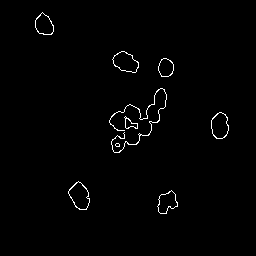

Number of Contours found = 9


In [50]:
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged_cleaned.copy(), 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
cv2_imshow(edged_cleaned)
cv2.waitKey(0)
  
print("Number of Contours found = " + str(len(contours)))


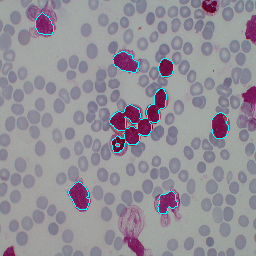

In [51]:
  # Draw all contours
# -1 signifies drawing all contours
original_img_copy = ALL_list[0].copy()
# print(opening_copy.shape)
cv2.drawContours(original_img_copy, contours, contourIdx = -1, color = (255, 255, 0), thickness = 1)

cv2_imshow(original_img_copy)

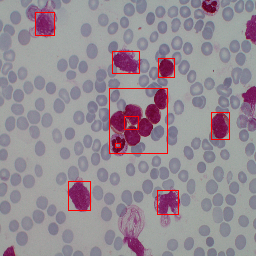

In [52]:
original_img_copy2 = ALL_list[0].copy()

for cont in contours:
    rect = cv2.boundingRect(cont)
    x,y,w,h = rect
    cv2.rectangle(original_img_copy2, (x,y),(x+w,y+h),(0,0,255),1)
cv2_imshow(original_img_copy2)

In [53]:
area = cv2.contourArea(contours[0])
hull = cv2.convexHull(contours[0])
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
print(solidity)

0.8592375366568915


In [54]:
original_img_copy3 = ALL_list[0].copy()

cropped_imgs = []
for cont in contours:
    rect = cv2.boundingRect(cont)
    x,y,w,h = rect
    img_crop = original_img_copy3[y:y+h, x:x+w]
    cropped_imgs.append(img_crop)
print(len(cropped_imgs))
cv2_imshow(cropped_imgs[8])

9


In [55]:
print(cropped_imgs[5].shape)
print(cropped_imgs[8].shape)
print(type(cropped_imgs))
print(type(cropped_imgs[5]))

(65, 58, 3)
(23, 19, 3)
<class 'list'>
<class 'numpy.ndarray'>


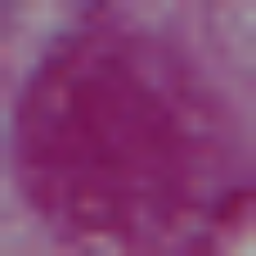

In [56]:
resized_cropped_img = []
for obj in cropped_imgs:
  obj_rsz = cv2.resize(obj, (256, 256), interpolation=cv2.INTER_LINEAR)
  resized_cropped_img.append(obj_rsz)
cv2_imshow(resized_cropped_img[8])